In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from bspline import *
import bspline.plotting as splt

A few utility plotting functions for this demo.

In [3]:
def get_info(spline):
    return "{} polynomials of degree {}".format(spline.knots.nb_curves, spline.knots.degree)

In [4]:
def plot_spline(s):
    splt.plot(s, with_knots=True, margin=0)
    plt.title(get_info(s))
    ax = plt.gca()
    ax.grid(True)

In [5]:
def plot_ex(ex):
    s = BSpline(**ex)
    plot_spline(s)

## Spline examples

(0.0, 3.0, 2.0, 6.0)

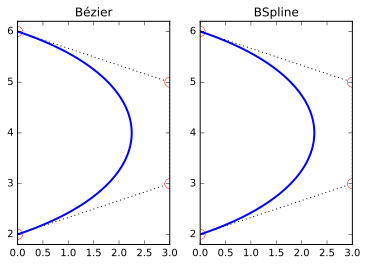

In [6]:
ex1 = {
'control_points': np.array([[0.,2], [3,3], [3,5], [0,6]]),
'knots': np.array([3.,3.,3.,4.,4.,4.])
}

plt.subplot(1,2,1)
b = Bezier(ex1['control_points'])
splt.plot(b)
plt.title("Bézier")
plt.axis('equal')
plt.subplot(1,2,2)
b_ = BSpline(**ex1)
splt.plot(b_)
plt.title("BSpline")
plt.axis('equal')


array([ 1.83333333,  4.83333333])

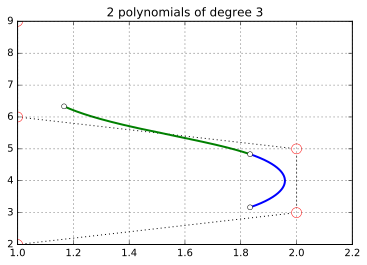

In [7]:
ex2 = {
'control_points': np.array([[1.,2], [2,3], [2,5], [1,6], [1,9]]),
'knots': np.array([1.,2.,3.,4.,5.,6.,7.])
}
plot_ex(ex2)
b2 = BSpline(**ex2)
b2(4.,lknot=3)
#list(b2.generate_points())[1]

### Continuous but not differentiable

[(2, 3.0, 4.0), (3, 4.0, 4.0), (4, 4.0, 4.0), (5, 4.0, 5.0)]


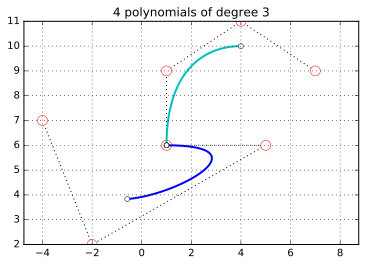

In [8]:
ex3 = {
'control_points': np.array([[-4.,7], [-2,2], [5,6], [1,6], [1,9], [4,11], [7,9]]),
'knots': np.array([1.,2.,3.,4.,4.,4.,5.,6.,6.])
}
plot_ex(ex3)
plt.axis('equal')
s3 = BSpline(**ex3)
print(list(s3.knots.intervals()))

### Discontinuous cubic

[(2, 3.0, 4.0), (3, 4.0, 4.0), (4, 4.0, 4.0), (5, 4.0, 4.0), (6, 4.0, 5.0)]


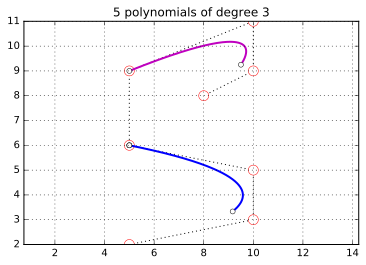

In [9]:
ex4 = {
'control_points': np.array([[5.,2], [10,3], [10,5], [5,6], [5,9], [10,11], [10,9], [8,8]]),
'knots': np.array([1.,2.,3.,4.,4.,4.,4.,5.,6.,6.])
}
plot_ex(ex4)
plt.axis('equal')
s4 = BSpline(**ex4)
print(list(s4.knots.intervals()))

### Discontinous quadratic

[(1, 1.0, 2.0), (2, 2.0, 2.0), (3, 2.0, 2.0), (4, 2.0, 3.0)]


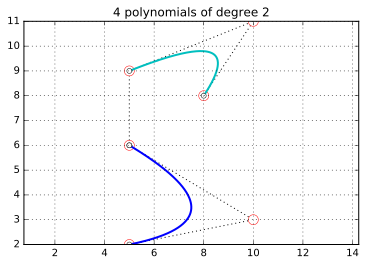

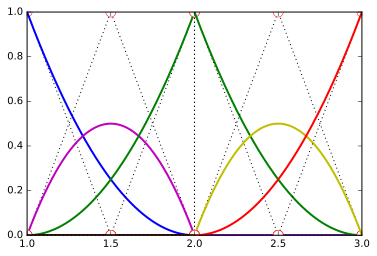

In [10]:
ex_d2 = {
'control_points': np.array([[5.,2], [10,3], [5,6], [5,9], [10,11],  [8,8]]),
'knots': np.array([1.,1.,2.,2.,2.,3.,3.,])
}
plot_ex(ex_d2)
s_d2 = BSpline(**ex_d2)
plt.axis('equal')
plt.figure()
for i in range(6):
    splt.plot(BSpline(*s_d2.knots.get_basis_data(i)))
print(list(s_d2.knots.intervals()))

In [11]:
p = np.array([[0.7,-0.4],
            [1.0,-0.4],
            [2.5,-1.2],
            [3.2,-.5],
            [-0.2,-.5],
            [.5,-1.2],
            [2.0,-.4],
            [2.3,-.4]])
(p - np.array([1.5,-1]))*np.array([1.,2./4*5])

array([[-0.8 ,  1.5 ],
       [-0.5 ,  1.5 ],
       [ 1.  , -0.5 ],
       [ 1.7 ,  1.25],
       [-1.7 ,  1.25],
       [-1.  , -0.5 ],
       [ 0.5 ,  1.5 ],
       [ 0.8 ,  1.5 ]])

[(2, 1.0, 1.2), (3, 1.2, 1.3999999999999999), (4, 1.3999999999999999, 1.6000000000000001), (5, 1.6000000000000001, 1.8), (6, 1.8, 2.0)]


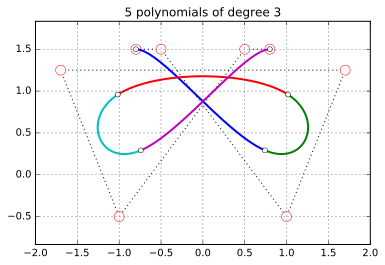

In [12]:
pretzel = {'control_points': np.array([[-0.8 ,  1.5 ],
       [-0.5 ,  1.5 ],
       [ 1.  , -0.5 ],
       [ 1.7 ,  1.25],
       [-1.7 ,  1.25],
       [-1.  , -0.5 ],
       [ 0.5 ,  1.5 ],
       [ 0.8 ,  1.5 ]]),
'knots': np.array([1.,1.,1.,1.2,1.4,1.6,1.8,2.,2.,2.])}
plot_ex(pretzel)
plt.axis('equal')
spretzel = BSpline(**pretzel)
print(list(spretzel.knots.intervals()))

## Basis plots

In [13]:
from bspline.knots import *

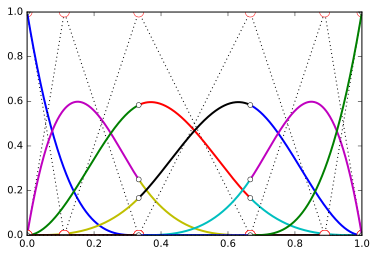

In [14]:
w = [ 0, 0, 0, 1/3, 2/3, 1, 1, 1]
wk = Knots(w, degree=3)
for k in range(6):
    splt.plot(BSpline(*wk.get_basis_data(k)), with_knots=True)

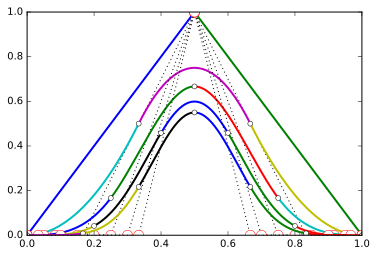

In [15]:
for i in range(3,8):
    k = get_basis_knots(np.arange(i)/(i-1))
    s = BSpline(*k.get_basis_data())
    splt.plot(s, with_knots=True)